# Bank Marketing Dataset Anaysis

#### Author: Geovanny Tabango
#### Description: Analysis of bank marketing campaign data


# CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

### 1. Bussiness Understanding
 - Marketing campaing from 2008 to 2010 (2 Years Data Colleted).
 - The target value `y` describes wether the customer holds subscribe deposit in the bank or not.
 - Its expected to have the samples a larger distribution of `no` subscription compared to the `yes`.
 - The marketing team is to use the information extracted from the data set to better orginze a strategy to possitevely indentify costumers that are more likely to say `yes` to subscribe to the deposit.
 - The end objective is to better utilize the resources of the banking allowing a more room of improvements in the calls.

### 2. Data Understanding

##### 2.1 Dependencies for data analyis and Machine Learning algorithms

In [1]:

# Data manipulation and analysis
import json
import joblib
import numpy as np
import os
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
#Set up for plotting style
sns.set_palette("deep")

In [3]:
# Set a ramdom seed for reproducibility
# The random seed method hold and arbitrary number
np.random.seed(98)

#### 2.2 Load the dataset

In [4]:
# Load the dataset in to a pandas dataframe.
# By exploring the dataset we can see that the data is a CSV file with a delimiter of semi-colon ';'.
df = pd.read_csv('../data/raw/bank-additional-full.csv', sep=';')
print(f"Data shape: {df.shape}")

Data shape: (41188, 21)


#### 2.3 Display the basic information of the dataset.

- By the description of the dataset there are 0 missing values. 

In [5]:
#Double checking for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
#Display the 5 firt rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#Display the 5 last rows of the dataset
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Display the columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
# Display the shape of the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# The skew method is to determine the skewness of the dataset.
# This method is only applied to the numerical type of data.
# 0 means the data is normally distributed.
# values close to 1 means the data is skewed to the right.
# values close to -1 means the data is skewed to the left.
df.skew(numeric_only=True)

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [12]:
# Display the unique values of the dataset.
# Selet all the 'object' type of columns and apply the values_counts method which will display the unique values of the columns.

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Value counts for column 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


Value counts for column 'default':
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes        21576
no         18622
unknown     

In [13]:
# Display the unique values in the dataset.

for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'age':
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Unique values in column 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Unique values in column 'marital':
['married' 'single' 'divorced' 'unknown']


Unique values in column 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Unique values in column 'default':
['no' 'unknown' 'yes']


Unique values in column 'housing':
['no' 'yes' 'unknown']


Unique values in column 'loan':
['no' 'yes' 'unknown']


Unique values in column 'contact':
['telephone' 'cellular']


Unique values in column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'de

#### 2.5 Exploratory Data Analysis (EDA)

In [14]:
# Step 1: Examine our dataset structure
print("Dataset Shape:", df.shape)
print("\nColumns in dataset:")
print(df.columns.tolist())

Dataset Shape: (41188, 21)

Columns in dataset:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


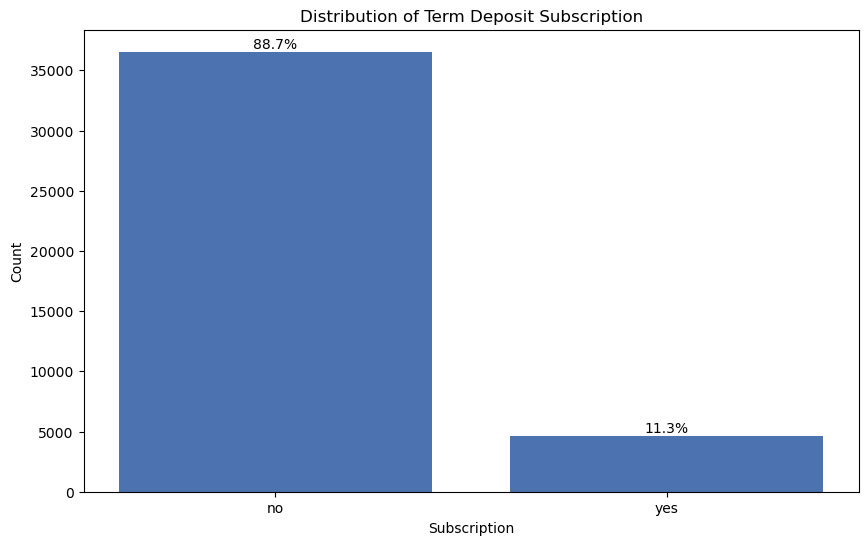


Target Variable Distribution:
y
no     88.73%
yes    11.27%
Name: proportion, dtype: object


In [15]:
# Step 2: Target Variable Analysis
def analyze_target_distribution(df):
    plt.figure(figsize=(10, 6))
    target_dist = df['y'].value_counts()
    
    # Create bar plot
    plt.bar(target_dist.index, target_dist.values)
    plt.title('Distribution of Term Deposit Subscription')
    plt.xlabel('Subscription')
    plt.ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for i, v in enumerate(target_dist.values):
        percentage = (v/total) * 100
        plt.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom')
    
    plt.savefig('../reports/figures/Task_1/target_variable_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nTarget Variable Distribution:")
    print(df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_target_distribution(df)


Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


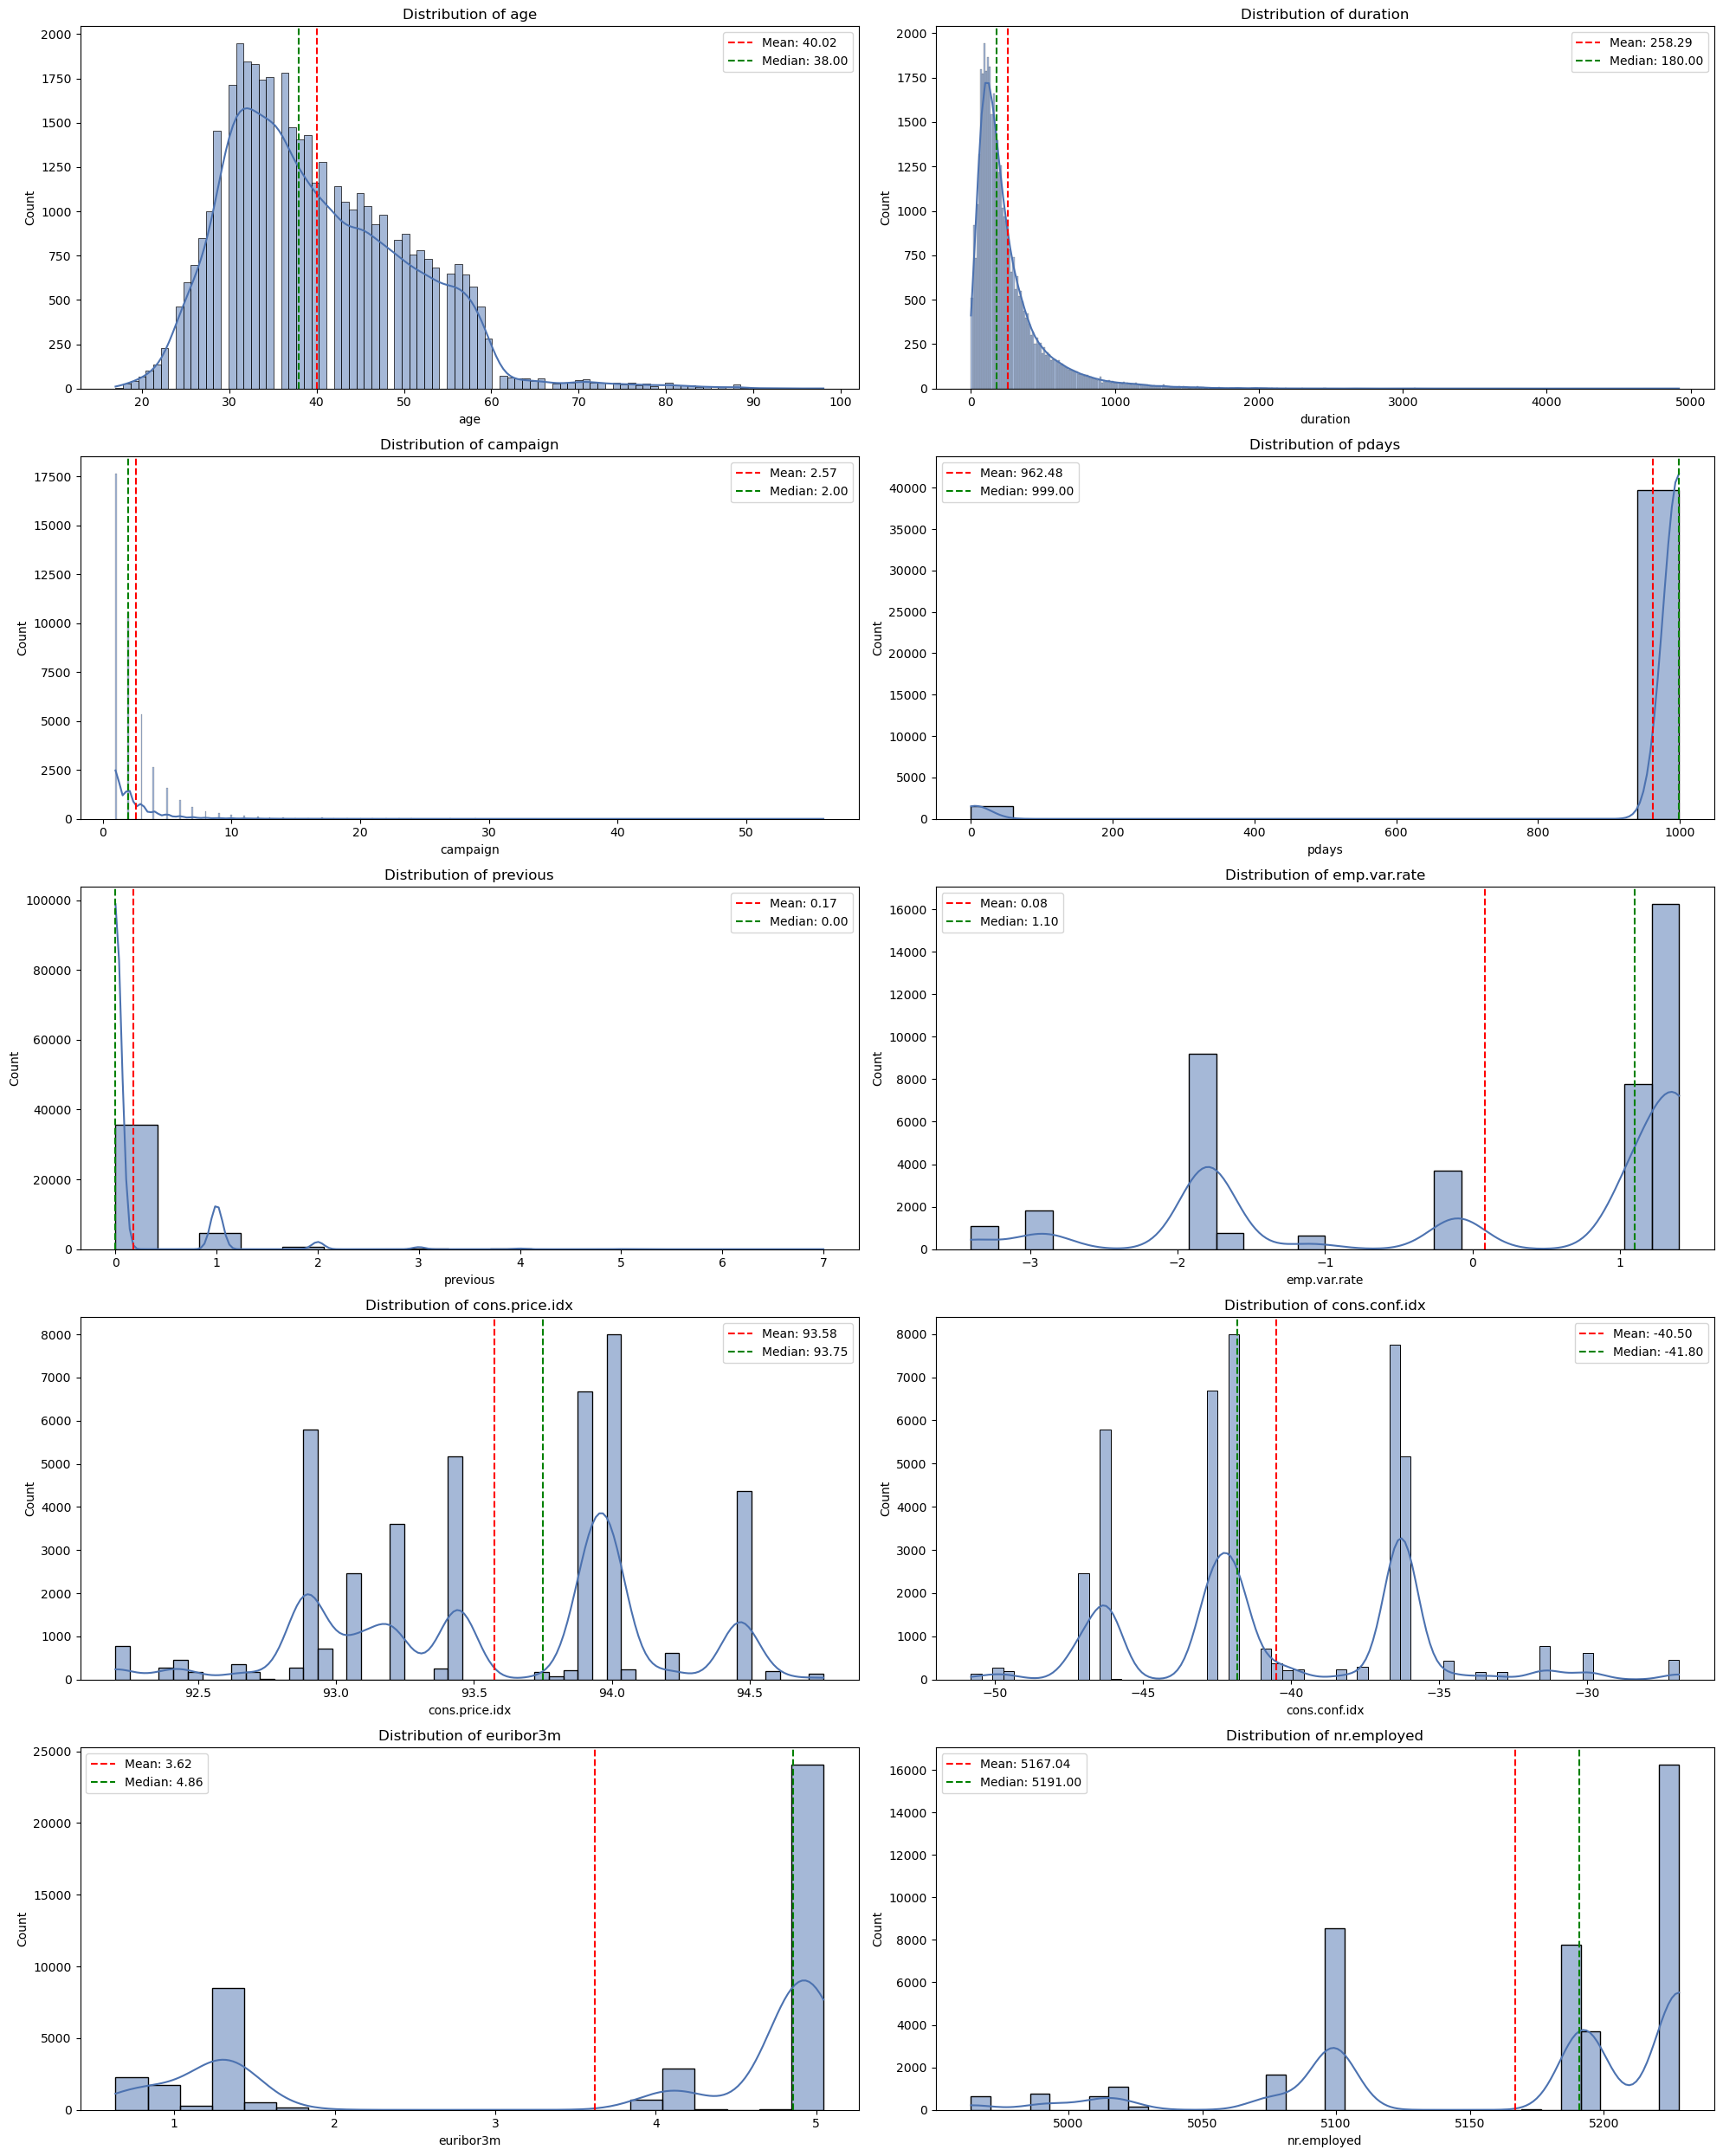


Numerical Features Summary Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.5

In [16]:
# Step 3: Numerical Features Analysis
def analyze_numerical_features(df):
    # Get numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nNumerical Features:", numerical_features.tolist())
    
    # Create distribution plots
    num_features = len(numerical_features)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()
    
    for i, feature in enumerate(numerical_features):
        # Plot histogram with KDE
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        
        # Add descriptive statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='r', linestyle='--', 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='g', linestyle='--', 
                       label=f'Median: {median_val:.2f}')
        axes[i].legend()
    
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/numerical_features_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nNumerical Features Summary Statistics:")
    print(df[numerical_features].describe())

analyze_numerical_features(df)


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


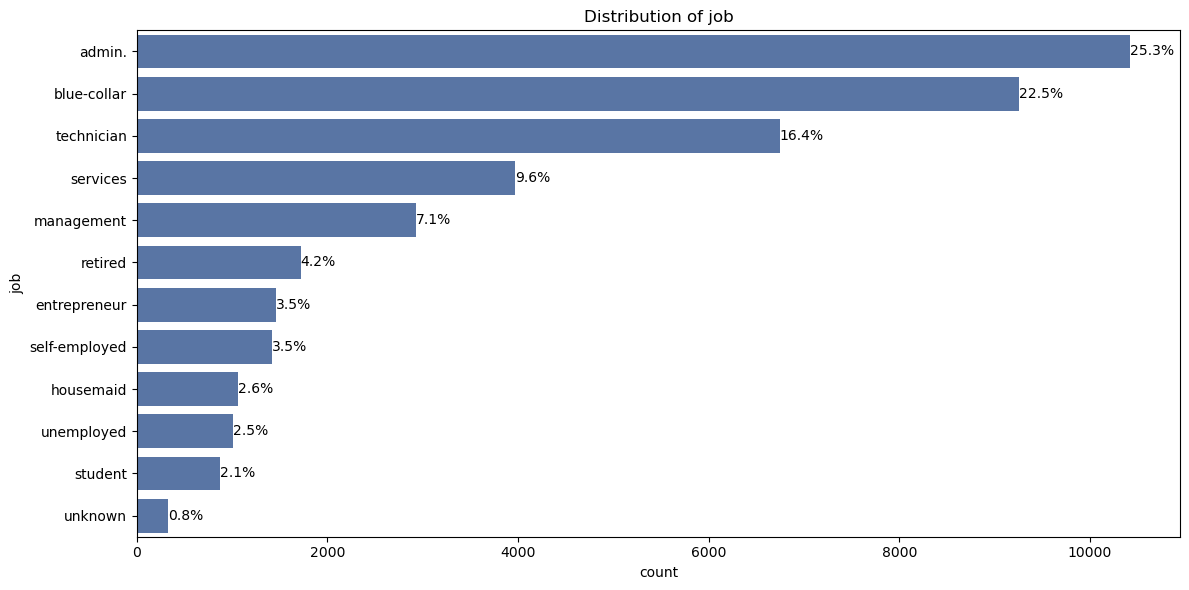


Distribution of job:
job
admin.            25.3%
blue-collar      22.47%
technician       16.37%
services          9.64%
management         7.1%
retired           4.18%
entrepreneur      3.54%
self-employed     3.45%
housemaid         2.57%
unemployed        2.46%
student           2.12%
unknown            0.8%
Name: proportion, dtype: object


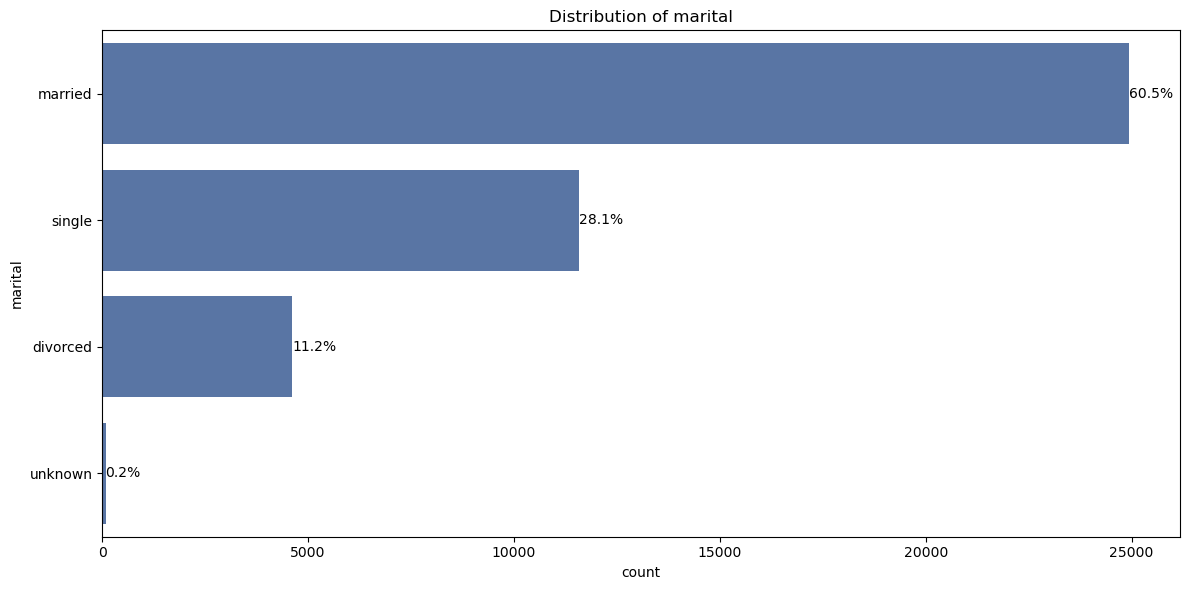


Distribution of marital:
marital
married     60.52%
single      28.09%
divorced     11.2%
unknown      0.19%
Name: proportion, dtype: object


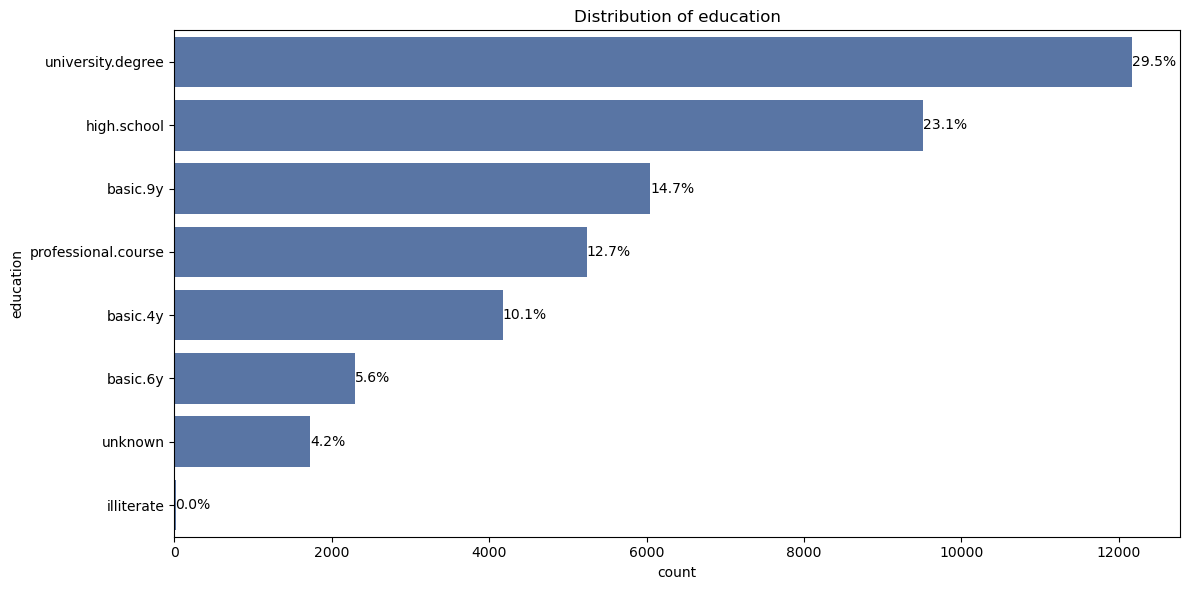


Distribution of education:
education
university.degree      29.54%
high.school             23.1%
basic.9y               14.68%
professional.course    12.73%
basic.4y               10.14%
basic.6y                5.56%
unknown                  4.2%
illiterate              0.04%
Name: proportion, dtype: object


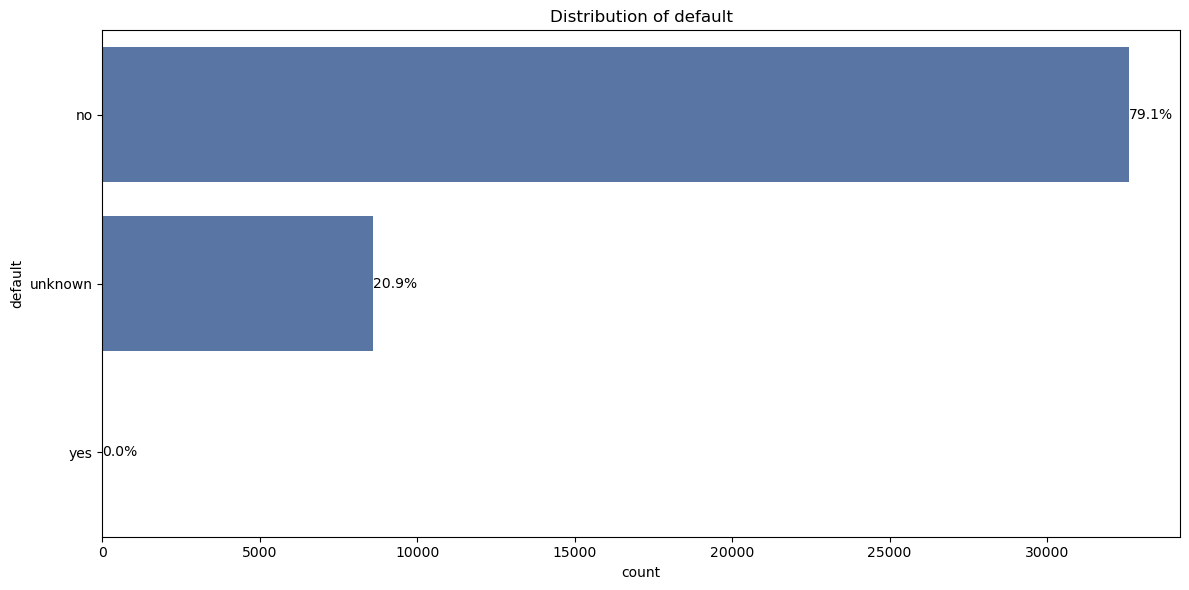


Distribution of default:
default
no         79.12%
unknown    20.87%
yes         0.01%
Name: proportion, dtype: object


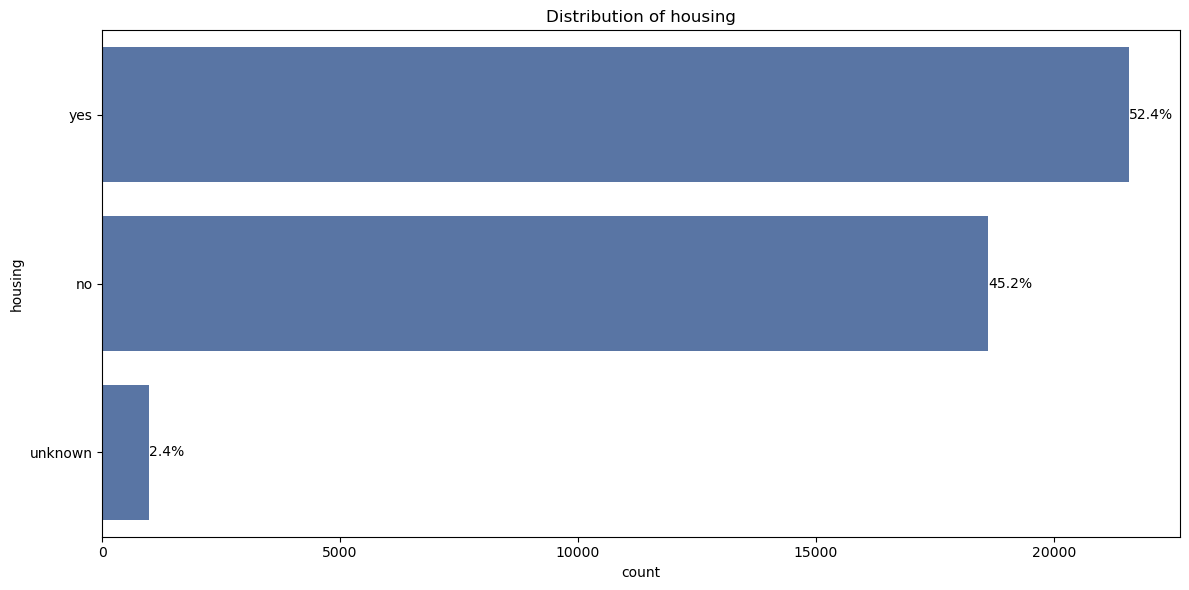


Distribution of housing:
housing
yes        52.38%
no         45.21%
unknown      2.4%
Name: proportion, dtype: object


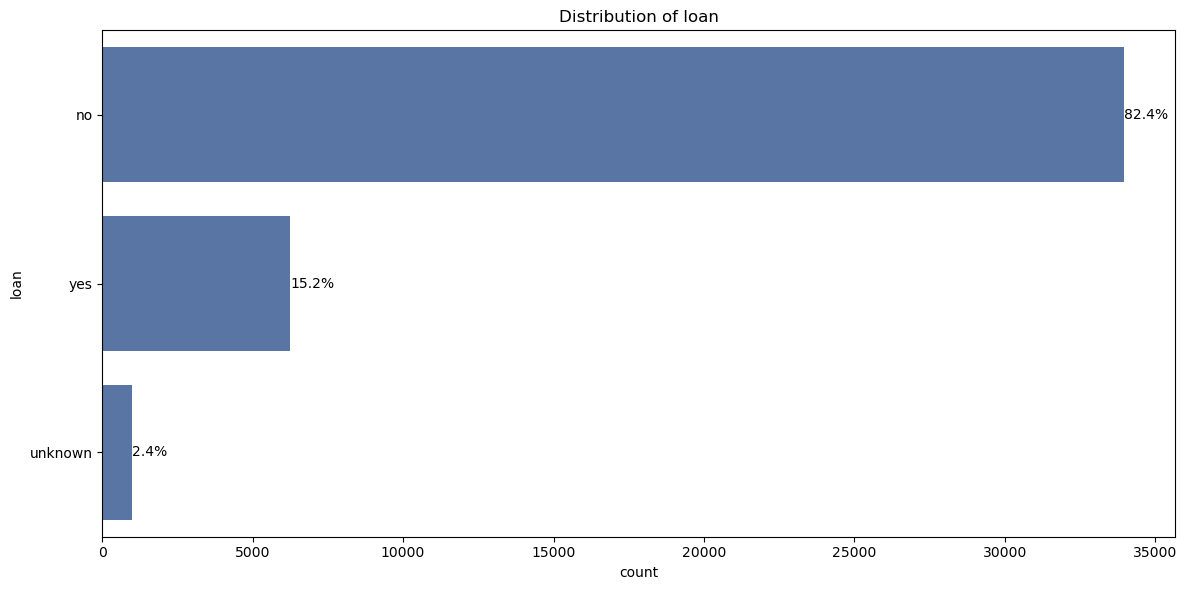


Distribution of loan:
loan
no         82.43%
yes        15.17%
unknown      2.4%
Name: proportion, dtype: object


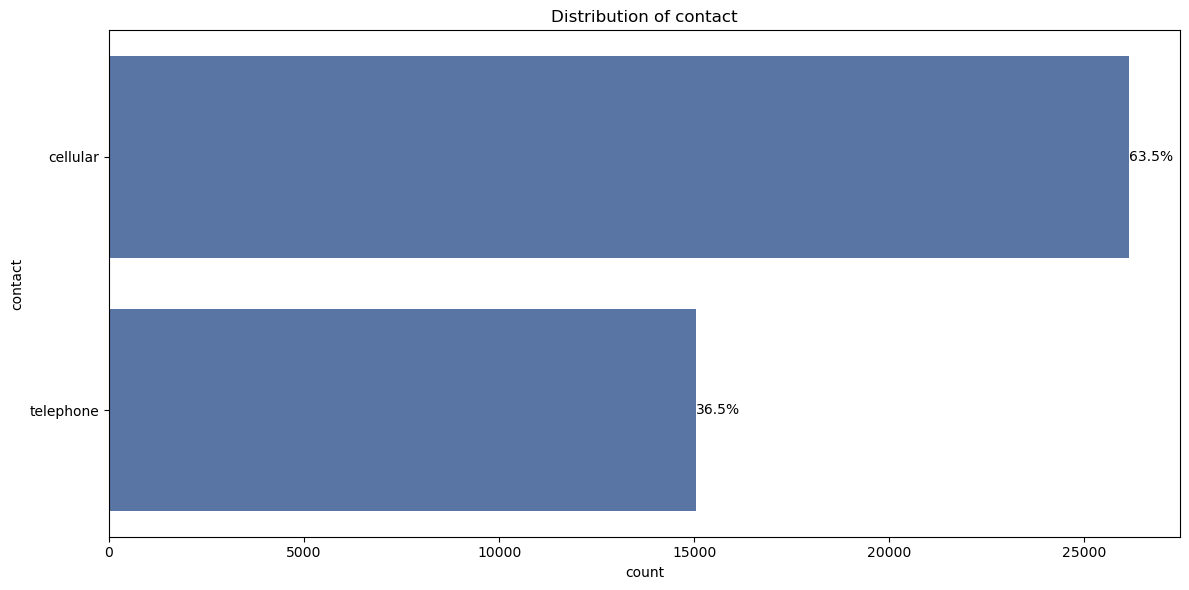


Distribution of contact:
contact
cellular     63.47%
telephone    36.53%
Name: proportion, dtype: object


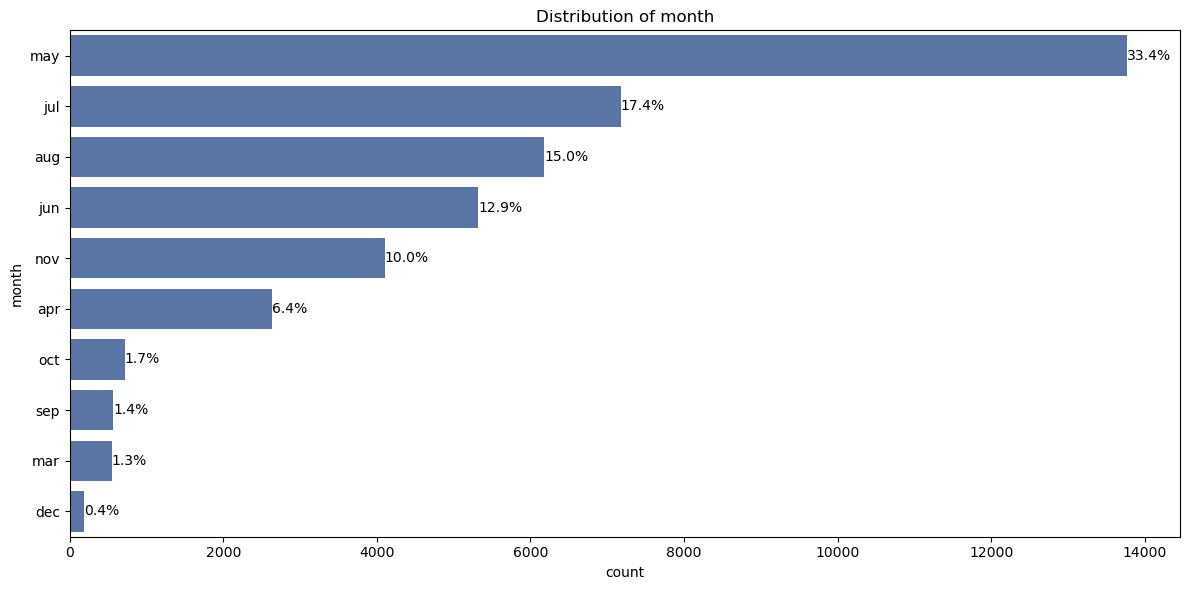


Distribution of month:
month
may    33.43%
jul    17.42%
aug     15.0%
jun    12.91%
nov     9.96%
apr     6.39%
oct     1.74%
sep     1.38%
mar     1.33%
dec     0.44%
Name: proportion, dtype: object


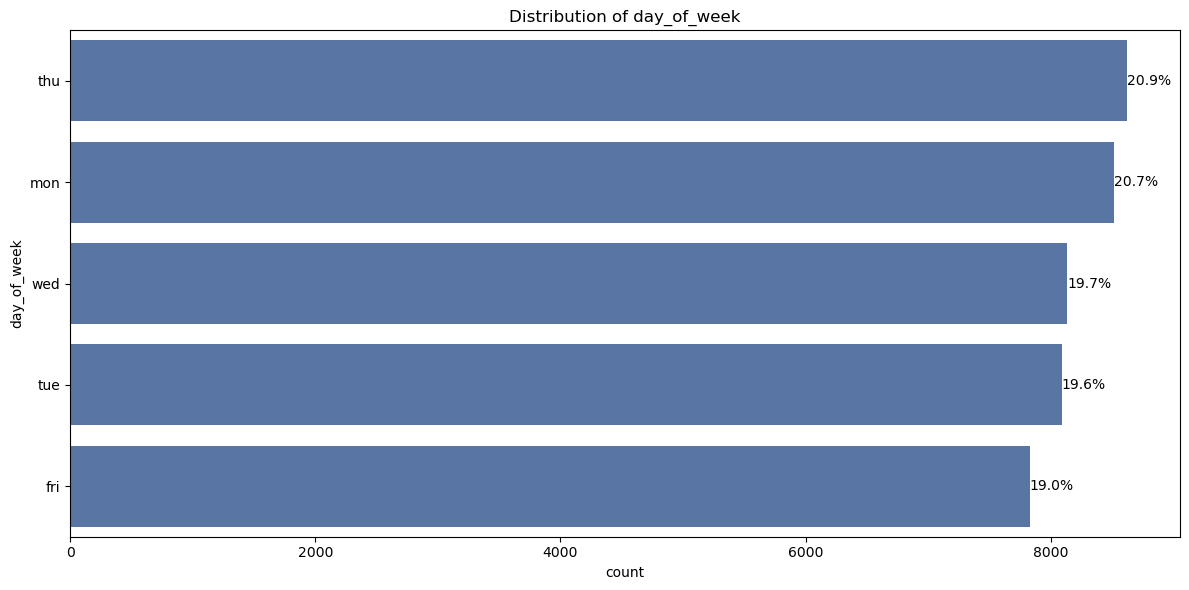


Distribution of day_of_week:
day_of_week
thu    20.94%
mon    20.67%
wed    19.75%
tue    19.64%
fri     19.0%
Name: proportion, dtype: object


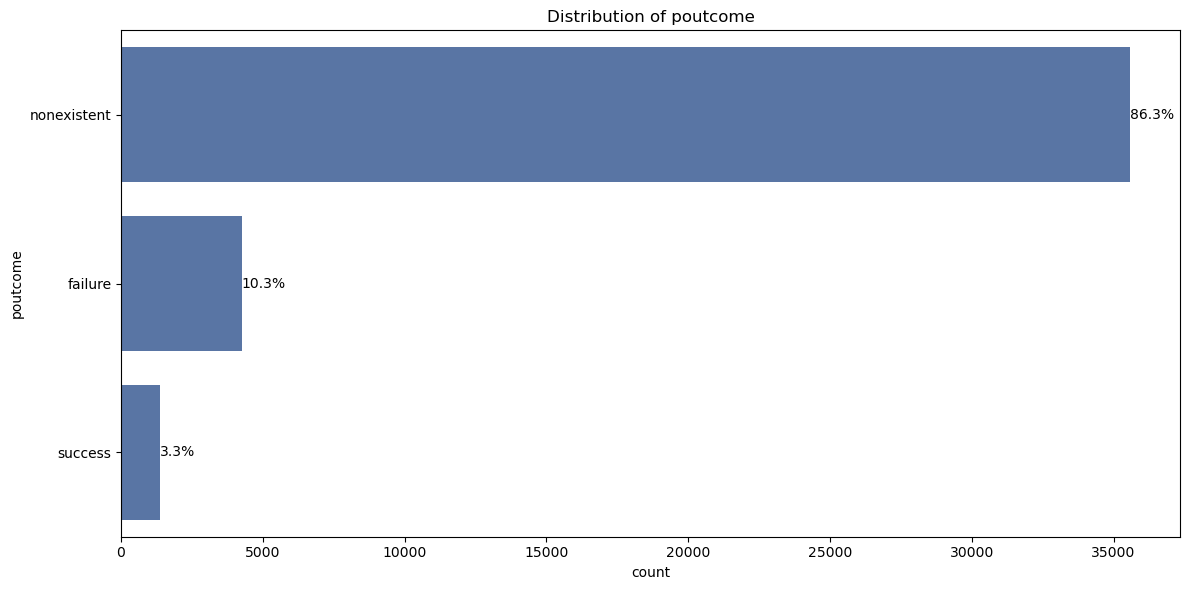


Distribution of poutcome:
poutcome
nonexistent    86.34%
failure        10.32%
success         3.33%
Name: proportion, dtype: object


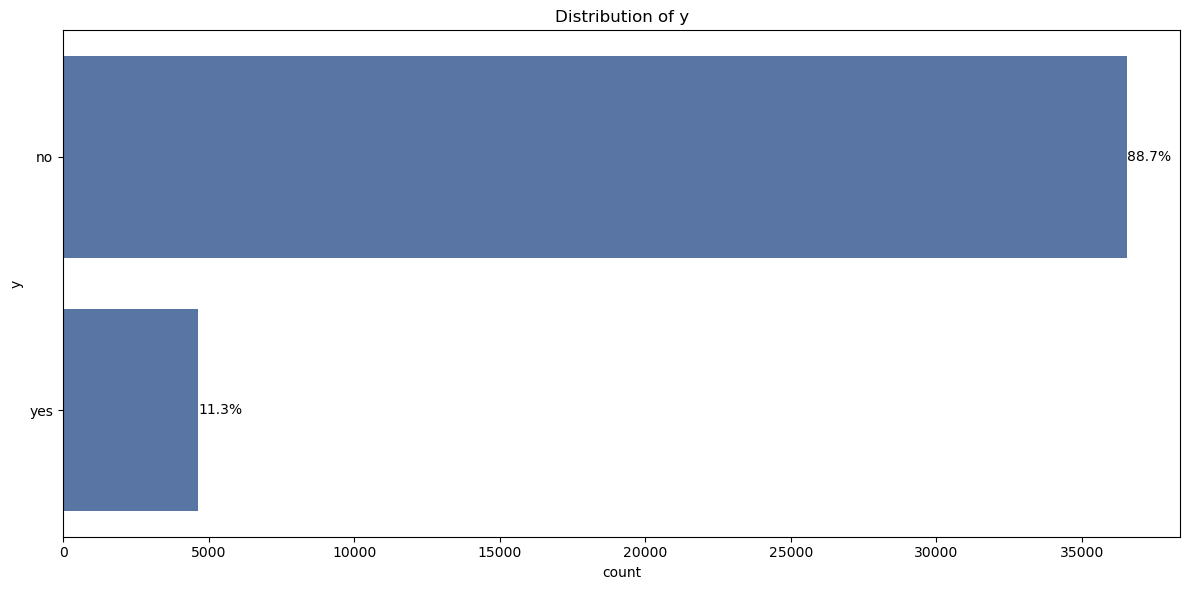


Distribution of y:
y
no     88.73%
yes    11.27%
Name: proportion, dtype: object


In [17]:
# Step 4: Categorical Features Analysis
def analyze_categorical_features(df):
    # Get categorical features
    categorical_features = df.select_dtypes(include=['object']).columns
    print("\nCategorical Features:", categorical_features.tolist())
    
    # Create distribution plots
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))
        
        # Create count plot
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        
        # Add percentage labels
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_width()/total
            plt.gca().annotate(f'{percentage:.1f}%', 
                             (p.get_width(), p.get_y()+p.get_height()/2),
                             ha='left', va='center')
        
        plt.tight_layout()
        plt.savefig(f'../reports/figures/Task_1/categorical_{feature}_distribution.png')
        plt.show()
        plt.close()
        
        # Print value counts and percentages
        print(f"\nDistribution of {feature}:")
        print(df[feature].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

analyze_categorical_features(df)

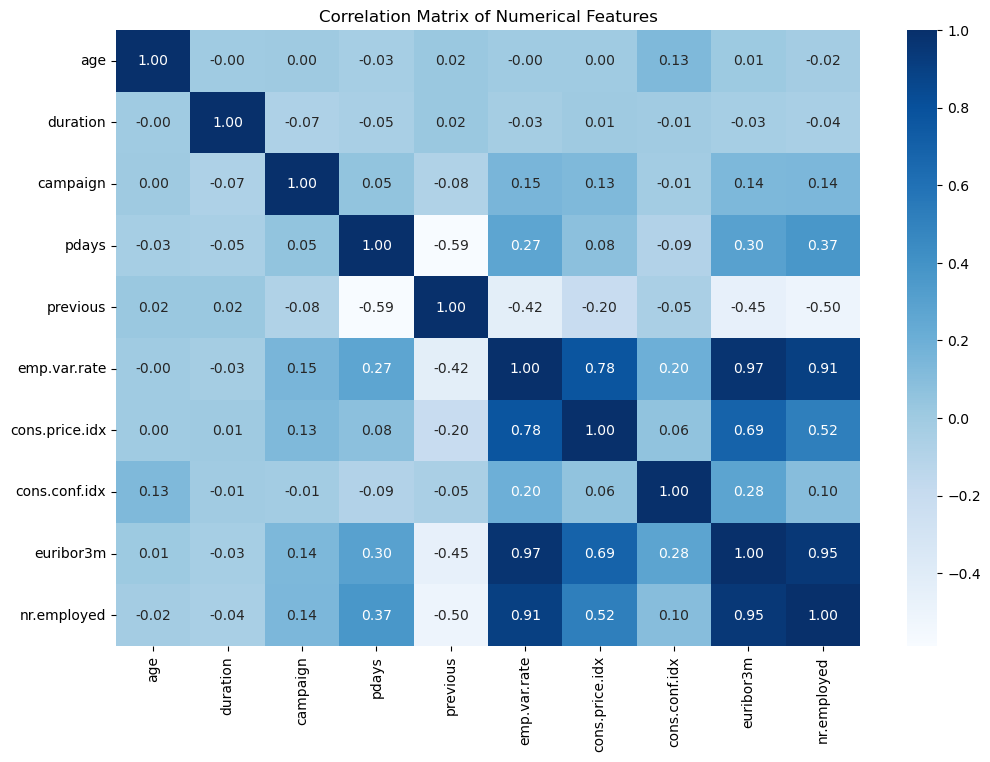


Strong Correlations (|correlation| > 0.5):
previous - pdays: -0.59
cons.price.idx - emp.var.rate: 0.78
euribor3m - emp.var.rate: 0.97
euribor3m - cons.price.idx: 0.69
nr.employed - previous: -0.50
nr.employed - emp.var.rate: 0.91
nr.employed - cons.price.idx: 0.52
nr.employed - euribor3m: 0.95


In [18]:
# Step 5: Correlation Analysis
def analyze_correlations(df):
    # Numerical correlations
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('../reports/figures/Task_1/correlation_matrix.png')
    plt.show()
    plt.close()
    
    # Print strong correlations
    print("\nStrong Correlations (|correlation| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_corr.append(f"{correlation_matrix.columns[i]} - "
                                 f"{correlation_matrix.columns[j]}: "
                                 f"{correlation_matrix.iloc[i, j]:.2f}")
    for corr in strong_corr:
        print(corr)

analyze_correlations(df)

### 3. Data Preparation

##### - The are features that are not label or do not have a definition in the documentation of the dataset.
##### - Therefore, in this steps the features that are not documented in the dataset will be drop from the dataset and keep the data features that had been labeled.
##### - The `duration` feature, the documentation specifically mentions that should be removed for a realistic predictive model. Since the data is known after a called is performed.

#### 3.1 Feature selection based on documentation.

In [19]:
def select_documented_features(df):
    """
    Select only the features documented in the dataset description.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    Returns:
        pd.DataFrame: Dataset with only documented features
    """
    features_to_keep = [
        # Bank client data
        'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        
        # Campaign related
        'contact', 'day_of_week', 'month', 'campaign', 'pdays', 'previous', 'poutcome',
        
        # Target
        'y'
    ]
    
    df_clean = df[features_to_keep].copy()
    print("Clean dataset shape:", df_clean.shape)
    print("\nFeatures kept:")
    for col in df_clean.columns:
        print(f"- {col}")
        
    return df_clean

# Create initial clean dataset
df_clean = select_documented_features(df)

Clean dataset shape: (41188, 15)

Features kept:
- age
- job
- marital
- education
- default
- housing
- loan
- contact
- day_of_week
- month
- campaign
- pdays
- previous
- poutcome
- y


#### 3.2 Feature Type Organization

In [20]:
def organize_features(df):
    """
    Organize features by their types for preprocessing.
    
    Parameters:
        df (pd.DataFrame): Input dataset
    Returns:
        dict: Dictionary containing feature groups
    """
    feature_groups = {
        'categorical_features': [
            'job',        # Occupation type
            'marital',    # Marital status
            'education',  # Education level
            'contact',    # Contact type
            'poutcome',   # Previous campaign outcome
            'season',     # Will be created from month
            'age_group'   # Will be created from age
        ],
        'numerical_features': [
            'campaign_log'  # Will be created from campaign
        ],
        'binary_features': [
            'default',      # Credit in default
            'housing',      # Housing loan
            'loan',        # Personal loan
            'housing_unknown',  # Will be created
            'loan_unknown',     # Will be created
        ],
        'date_features': [
            'month',
            'day_of_week'
        ],
        'special_features': [
            'pdays',
            'previous'
        ],
        'target': 'y'
    }
    
    return feature_groups

feature_groups = organize_features(df_clean)

#### 3.3 Data Prepocessing Steps

In [21]:
# Step 1: Handle Binary Features
def process_binary_features(df, binary_features):
    """
    Process binary features by handling unknown values.
    
    Parameters:
        df (pd.DataFrame): Input dataset
        binary_features (list): List of binary features
    Returns:
        pd.DataFrame: Dataset with processed binary features
    """
    df_processed = df.copy()
    
    for feature in binary_features:
        # Create unknown flag
        df_processed[f'{feature}_unknown'] = (df_processed[feature] == 'unknown').astype(int)
        # Replace unknown with mode
        df_processed[feature] = df_processed[feature].replace('unknown', df_processed[feature].mode()[0])
        # Convert to numeric
        le = LabelEncoder()
        df_processed[feature] = le.fit_transform(df_processed[feature])
        
    return df_processed

# Apply binary feature processing
df_processed = process_binary_features(df_clean, ['default', 'housing', 'loan'])
print("Binary features processed. Shape:", df_processed.shape)

Binary features processed. Shape: (41188, 18)


In [22]:
# Step 2: Process Contact History
def process_contact_history(df):
    """
    Create contact history feature from pdays and previous.
    
    Parameters:
        df (pd.DataFrame): Input dataset
    Returns:
        pd.DataFrame: Dataset with contact history feature
    """
    df_processed = df.copy()
    
    # Create binary flags
    df_processed['previously_contacted'] = (df_processed['pdays'] != 999).astype(int)
    df_processed['had_previous_contact'] = (df_processed['previous'] > 0).astype(int)
    
    # Create combined feature
    df_processed['contact_history'] = df_processed.apply(
        lambda x: 2 if (x['previously_contacted'] == 1 and x['had_previous_contact'] == 1)
        else 1 if (x['previously_contacted'] == 1 or x['had_previous_contact'] == 1)
        else 0, axis=1
    )
    
    # Drop original features
    df_processed = df_processed.drop(['pdays', 'previous', 'previously_contacted', 'had_previous_contact'], axis=1)
    
    return df_processed

df_processed = process_contact_history(df_processed)
print("Contact history feature created. Shape:", df_processed.shape)

Contact history feature created. Shape: (41188, 17)


In [23]:
# Step 3: Process Categorical Features
def process_categorical_features(df):
   """
   Process categorical features by combining categories and handling groups.
   
   Parameters:
       df (pd.DataFrame): Input dataset
   Returns:
       pd.DataFrame: Dataset with processed categorical features
   """
   df_processed = df.copy()
   
   # Education: Combine basic education levels
   education_mapping = {
       'basic.4y': 'basic',
       'basic.6y': 'basic', 
       'basic.9y': 'basic',
       'illiterate': 'basic'
   }
   df_processed['education'] = df_processed['education'].replace(education_mapping)
   
   # Job: Group low-frequency categories
   job_counts = df_processed['job'].value_counts()
   low_freq_jobs = job_counts[job_counts < 1000].index
   df_processed['job'] = df_processed['job'].replace(
       {job: 'other' for job in low_freq_jobs}
   )
   
   return df_processed

df_processed = process_categorical_features(df_processed)
print("Categorical features processed. Shape:", df_processed.shape)

Categorical features processed. Shape: (41188, 17)


In [24]:
# Step 4: Process Date Features
def process_date_features(df):
    """
    Process date features by creating seasonal and day-type features.
    
    Parameters:
        df (pd.DataFrame): Input dataset
    Returns:
        pd.DataFrame: Dataset with processed date features
    """
    df_processed = df.copy()
    
    # Create seasons from months
    season_mapping = {
        'mar': 'spring', 'apr': 'spring', 'may': 'spring',
        'jun': 'summer', 'jul': 'summer', 'aug': 'summer',
        'sep': 'autumn', 'oct': 'autumn', 'nov': 'autumn',
        'dec': 'winter'
    }
    df_processed['season'] = df_processed['month'].map(season_mapping)
    
    # Create day type features
    df_processed['is_weekstart'] = df_processed['day_of_week'].isin(['mon', 'tue']).astype(int)
    df_processed['is_weekmid'] = df_processed['day_of_week'].isin(['wed', 'thu']).astype(int)
    df_processed['is_weekend'] = df_processed['day_of_week'].isin(['fri']).astype(int)
    
    # Drop original date features
    df_processed = df_processed.drop(['month', 'day_of_week'], axis=1)
    
    return df_processed

df_processed = process_date_features(df_processed)
print("Date features processed. Shape:", df_processed.shape)

Date features processed. Shape: (41188, 19)


In [25]:
# Step 5: Process Numerical Features
def process_numerical_features(df):
    """
    Process numerical features by creating age groups and transforming campaign.
    
    Parameters:
        df (pd.DataFrame): Input dataset
    Returns:
        pd.DataFrame: Dataset with processed numerical features
    """
    df_processed = df.copy()
    
    # Create age groups
    df_processed['age_group'] = pd.cut(
        df_processed['age'],
        bins=[0, 25, 35, 45, 55, np.inf],
        labels=['young', 'young_adult', 'adult', 'senior', 'elderly']
    )
    
    # Log transform campaign
    df_processed['campaign_log'] = np.log1p(df_processed['campaign'])
    
    # Drop original numerical features
    df_processed = df_processed.drop(['age', 'campaign'], axis=1)
    
    return df_processed

df_processed = process_numerical_features(df_processed)
print("Numerical features processed. Shape:", df_processed.shape)

Numerical features processed. Shape: (41188, 19)


In [26]:
# Step 6: Final Pipeline Setup
def create_preprocessing_pipeline(df_processed):
    """
    Create the final preprocessing pipeline.
    
    Parameters:
        df_processed (pd.DataFrame): Processed dataset
    Returns:
        tuple: Preprocessor, feature lists, and feature information
    """
    # Define final feature groups
    categorical_features = [
        'job', 'marital', 'education', 'contact', 'poutcome', 
        'season', 'age_group'
    ]
    
    numerical_features = ['campaign_log']
    
    binary_features = [
        'default', 'housing', 'loan', 
        'housing_unknown', 'loan_unknown',
        'is_weekstart', 'is_weekmid', 'is_weekend',
        'contact_history'
    ]
    
    # Create transformers
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
    
    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'  # Keep binary features as is
    )
    
    # Save feature information
    feature_info = {
        'categorical_features': categorical_features,
        'numerical_features': numerical_features,
        'binary_features': binary_features
    }
    
    return preprocessor, feature_info

preprocessor, feature_info = create_preprocessing_pipeline(df_processed)

In [29]:
# Step 7: Save Processed Data
def save_processed_data(df_processed, feature_info):
    """
    Save the processed data and feature information.
    
    Parameters:
        df_processed (pd.DataFrame): Processed dataset
        feature_info (dict): Feature group information
    """
    # Save processed dataset
    df_processed.to_csv('../data/processed/Task_1_processed/processed_data.csv', index=False)
    
    # Save feature information
    with open('../data/processed/Task_1_processed/feature_info.json', 'w') as f:
        json.dump(feature_info, f, indent=4)
    
    print("\nProcessing completed and saved!")
    print(f"Final dataset shape: {df_processed.shape}")
    print("\nFeature counts:")
    for feature_type, features in feature_info.items():
        print(f"{feature_type}: {len(features)}")

# Save the processed data
save_processed_data(df_processed, feature_info)


Processing completed and saved!
Final dataset shape: (41188, 19)

Feature counts:
categorical_features: 7
numerical_features: 1
binary_features: 9


In [30]:
def validate_preprocessing(df_original, df_processed, feature_info):
    """
    Validate the preprocessing results with multiple checks.
    
    Parameters:
        df_original (pd.DataFrame): Original dataset
        df_processed (pd.DataFrame): Processed dataset
        feature_info (dict): Feature information dictionary
    Returns:
        bool: True if all validations pass
    """
    print("Running Preprocessing Validation Checks...")
    validation_results = []
    
    # 1. Basic Data Validation
    print("\n1. Basic Data Validation:")
    rows_match = len(df_original) == len(df_processed)
    print(f"Row count preserved: {rows_match}")
    validation_results.append(rows_match)
    
    has_nulls = df_processed.isnull().any().any()
    print(f"No missing values: {not has_nulls}")
    validation_results.append(not has_nulls)
    
    # 2. Feature Type Validation
    print("\n2. Feature Type Validation:")
    all_expected_features = (
        feature_info['categorical_features'] + 
        feature_info['numerical_features'] + 
        feature_info['binary_features']
    )
    features_present = all(f in df_processed.columns for f in all_expected_features)
    print(f"All expected features present: {features_present}")
    validation_results.append(features_present)
    
    # 3. Binary and Categorical Features Validation
    print("\n3. Feature Value Validation:")
    
    # Modified to handle contact_history separately
    for feature in feature_info['binary_features']:
        if feature == 'contact_history':
            valid_values = df_processed[feature].isin([0, 1, 2]).all()
            print(f"{feature} has valid values (0,1,2): {valid_values}")
            validation_results.append(valid_values)
        else:
            unique_values = df_processed[feature].unique()
            is_binary = len(unique_values) == 2 and set(unique_values).issubset({0, 1})
            print(f"{feature} is binary (0/1): {is_binary}")
            validation_results.append(is_binary)
    
    # 4. Categorical Features Validation
    print("\n4. Categorical Features Validation:")
    for feature in feature_info['categorical_features']:
        if feature == 'education':
            valid_categories = {'basic', 'high.school', 'university.degree', 
                              'professional.course', 'unknown'}
            actual_categories = set(df_processed[feature].unique())
            is_valid = actual_categories.issubset(valid_categories)
            print(f"{feature} has expected categories: {is_valid}")
            validation_results.append(is_valid)
    
    # 5. Numerical Features Validation
    print("\n5. Numerical Features Validation:")
    for feature in feature_info['numerical_features']:
        if feature == 'campaign_log':
            # Check if values are non-negative and finite
            is_valid = (df_processed[feature] >= 0).all() and np.isfinite(df_processed[feature]).all()
            print(f"{feature} has valid values: {is_valid}")
            validation_results.append(is_valid)
    
    # 6. Target Variable Validation
    print("\n6. Target Variable Validation:")
    original_target_dist = df_original['y'].value_counts(normalize=True)
    processed_target_dist = df_processed['y'].value_counts(normalize=True)
    target_preserved = np.allclose(original_target_dist, processed_target_dist)
    print(f"Target distribution preserved: {target_preserved}")
    validation_results.append(target_preserved)
    
    # 7. Data Quality Validation
    print("\n7. Data Quality Validation:")
    has_inf = np.isinf(df_processed.select_dtypes(include=np.number)).any().any()
    print(f"No infinite values: {not has_inf}")
    validation_results.append(not has_inf)
    
    categorical_check = True
    for feature in feature_info['categorical_features']:
        n_unique = df_processed[feature].nunique()
        if n_unique < 2:
            categorical_check = False
            print(f"Warning: {feature} has only {n_unique} unique values")
    print(f"Categorical features have sufficient unique values: {categorical_check}")
    validation_results.append(categorical_check)
    
    # Final Validation Result
    all_validations_passed = all(validation_results)
    print(f"\nFinal Validation Result: {'PASSED' if all_validations_passed else 'FAILED'}")
    print(f"Passed {sum(validation_results)}/{len(validation_results)} checks")
    
    return all_validations_passed

# Let's also fix the preprocessing steps that caused the validation failures:

def process_contact_history(df):
    """
    Create contact history feature from pdays and previous.
    Now ensures values are 0, 1, or 2.
    """
    df_processed = df.copy()
    
    # Create binary flags
    df_processed['previously_contacted'] = (df_processed['pdays'] != 999).astype(int)
    df_processed['had_previous_contact'] = (df_processed['previous'] > 0).astype(int)
    
    # Create combined feature ensuring only 0, 1, 2 values
    df_processed['contact_history'] = df_processed.apply(
        lambda x: 2 if (x['previously_contacted'] == 1 and x['had_previous_contact'] == 1)
        else 1 if (x['previously_contacted'] == 1 or x['had_previous_contact'] == 1)
        else 0, axis=1
    )
    
    # Verify values
    assert df_processed['contact_history'].isin([0, 1, 2]).all(), "Invalid contact_history values"
    
    # Drop original features
    df_processed = df_processed.drop(['pdays', 'previous', 'previously_contacted', 'had_previous_contact'], axis=1)
    
    return df_processed

def process_numerical_features(df):
    """
    Process numerical features with proper validation.
    """
    df_processed = df.copy()
    
    # Create age groups
    df_processed['age_group'] = pd.cut(
        df_processed['age'],
        bins=[0, 25, 35, 45, 55, np.inf],
        labels=['young', 'young_adult', 'adult', 'senior', 'elderly']
    )
    
    # Log transform campaign with validation
    campaign_values = df_processed['campaign']
    assert (campaign_values > 0).all(), "Campaign values must be positive"
    df_processed['campaign_log'] = np.log1p(campaign_values)
    
    # Drop original numerical features
    df_processed = df_processed.drop(['age', 'campaign'], axis=1)
    
    return df_processed

In [31]:
# Rerun preprocessing with fixed functions
df_processed = process_binary_features(df_clean, ['default', 'housing', 'loan'])
df_processed = process_contact_history(df_processed)
df_processed = process_categorical_features(df_processed)
df_processed = process_date_features(df_processed)
df_processed = process_numerical_features(df_processed)

# Run validation again
validation_passed = validate_preprocessing(df, df_processed, feature_info)

Running Preprocessing Validation Checks...

1. Basic Data Validation:
Row count preserved: True
No missing values: True

2. Feature Type Validation:
All expected features present: True

3. Feature Value Validation:
default is binary (0/1): True
housing is binary (0/1): True
loan is binary (0/1): True
housing_unknown is binary (0/1): True
loan_unknown is binary (0/1): True
is_weekstart is binary (0/1): True
is_weekmid is binary (0/1): True
is_weekend is binary (0/1): True
contact_history has valid values (0,1,2): True

4. Categorical Features Validation:
education has expected categories: True

5. Numerical Features Validation:
campaign_log has valid values: True

6. Target Variable Validation:
Target distribution preserved: True

7. Data Quality Validation:
No infinite values: True
Categorical features have sufficient unique values: True

Final Validation Result: PASSED
Passed 17/17 checks


In [32]:
# Display Preprocessed Dataset Overview
def display_preprocessed_summary(df_processed):
    """
    Display comprehensive summary of the preprocessed dataset.
    """
    print("1. Preprocessed Dataset Overview")
    print("-" * 50)
    print(f"Dataset Shape: {df_processed.shape}")
    print("\nFeature Types:")
    print(df_processed.dtypes)
    
    print("\n2. Feature Distributions")
    print("-" * 50)
    
    # Categorical Features
    print("\nCategorical Features:")
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df_processed[col].value_counts(normalize=True).round(3) * 100, "%")
    
    # Numerical Features
    print("\nNumerical Features:")
    numerical_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns
    print(df_processed[numerical_cols].describe())
    
    # Binary Features
    print("\nBinary Features:")
    binary_cols = [col for col in numerical_cols 
                  if set(df_processed[col].unique()).issubset({0, 1, 2})]
    for col in binary_cols:
        print(f"\n{col}:")
        print(df_processed[col].value_counts(normalize=True).round(3) * 100, "%")

display_preprocessed_summary(df_processed)

1. Preprocessed Dataset Overview
--------------------------------------------------
Dataset Shape: (41188, 19)

Feature Types:
job                  object
marital              object
education            object
default               int32
housing               int32
loan                  int32
contact              object
poutcome             object
y                    object
default_unknown       int32
housing_unknown       int32
loan_unknown          int32
contact_history       int64
season               object
is_weekstart          int32
is_weekmid            int32
is_weekend            int32
age_group          category
campaign_log        float64
dtype: object

2. Feature Distributions
--------------------------------------------------

Categorical Features:

job:
job
admin.           25.3
blue-collar      22.5
technician       16.4
services          9.6
management        7.1
retired           4.2
entrepreneur      3.5
self-employed     3.5
other             2.9
housemaid         2

In [33]:
# Save Preprocessing State and Information
def save_preprocessing_state(df_processed, feature_info):
    """
    Save the preprocessed dataset and related information.
    """
    
    # Save preprocessed data
    df_processed.to_csv('../data/processed/Task_1_processed/model_ready/preprocessed_data.csv', 
                       index=False)
    
    # Save feature information
    with open('../data/processed/Task_1_processed/model_ready/feature_info_.json', 'w') as f:
        json.dump(feature_info, f, indent=4)
        
    # Save data description
    with open('../data/processed/Task_1_processed/model_ready/data_description.txt', 'w') as f:
        f.write("Preprocessed Dataset Description\n")
        f.write("=" * 30 + "\n\n")
        f.write(f"Number of samples: {len(df_processed)}\n")
        f.write(f"Number of features: {len(df_processed.columns)-1}\n\n")
        f.write("Feature Types:\n")
        for feature_type, features in feature_info.items():
            f.write(f"\n{feature_type}:\n")
            for feature in features:
                f.write(f"- {feature}\n")

save_preprocessing_state(df_processed, feature_info)

### 4.Data Modelling

#### 4.1 Data Split Strategy

In [34]:
# 4.1 Data Split Strategy
def create_model_splits(df_processed, test_size=0.2, random_state=42):
    """
    Create two independent sets:
    - Set A (80%): For model development (will be split into train/val/test)
    - Set B (20%): For final evaluation only
    
    Parameters:
        df_processed: Preprocessed dataframe
        test_size: Size of final holdout set
        random_state: For reproducibility
    """
    
    # Encode target variable
    label_encoder = LabelEncoder()
    df_processed = df_processed.copy()
    df_processed['y'] = label_encoder.fit_transform(df_processed['y'])
    
    # First split: Separate development set and final evaluation set
    df_development, df_evaluation = train_test_split(
        df_processed,
        test_size=test_size,
        random_state=random_state,
        stratify=df_processed['y']
    )
    
    # Second split: Split development set into train, validation, and test
    # First, separate features and target
    X_dev = df_development.drop('y', axis=1)
    y_dev = df_development['y']
    
    # Split into train and temp
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_dev, 
        y_dev,
        test_size=0.3,  # 70% for training
        random_state=random_state,
        stratify=y_dev
    )
    
    # Split temp into validation and test
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp,
        y_temp,
        test_size=0.5,  # Split remaining 30% equally
        random_state=random_state,
        stratify=y_temp
    )
    
    # Save final evaluation set separately
    X_eval = df_evaluation.drop('y', axis=1)
    y_eval = df_evaluation['y']
    
    # Print split sizes
    print("Data Split Sizes:")
    print(f"Training set: {len(X_train)} samples")
    print(f"Validation set: {len(X_val)} samples")
    print(f"Test set: {len(X_test)} samples")
    print(f"Final evaluation set: {len(X_eval)} samples")
    
    return {
        'development': {
            'train': (X_train, y_train),
            'val': (X_val, y_val),
            'test': (X_test, y_test)
        },
        'evaluation': (X_eval, y_eval)
    }

# Create the splits
splits = create_model_splits(df_processed)

Data Split Sizes:
Training set: 23065 samples
Validation set: 4942 samples
Test set: 4943 samples
Final evaluation set: 8238 samples


In [35]:
# 4.2 Create Preprocessing Pipeline for Models
def create_model_pipeline(categorical_features, numerical_features):
    """
    Create preprocessing pipeline for model features.
    """
    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), 
             categorical_features)
        ],
        remainder='passthrough'  # Keep other features as is
    )
    
    return preprocessor

# Create pipeline for our features
preprocessor = create_model_pipeline(
    categorical_features=feature_info['categorical_features'],
    numerical_features=feature_info['numerical_features']
)

In [36]:
# 4.3 Model Selection and Training
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, preprocessor):
    """
    Train model and evaluate on validation set.
    """
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_val)
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred, pos_label=1),
        'recall': recall_score(y_val, y_pred, pos_label=1),
        'f1': f1_score(y_val, y_pred, pos_label=1)
    }
    
    return pipeline, metrics

# Train multiple models
models = {
    'random_forest': RandomForestClassifier(random_state=42),
    'logistic_regression': LogisticRegression(random_state=42)
}

model_results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    pipeline, metrics = train_and_evaluate_model(
        model,
        splits['development']['train'][0],
        splits['development']['train'][1],
        splits['development']['val'][0],
        splits['development']['val'][1],
        preprocessor
    )
    model_results[name] = {
        'pipeline': pipeline,
        'metrics': metrics
    }
    print(f"Validation metrics for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Training random_forest...
Validation metrics for random_forest:
accuracy: 0.8766
precision: 0.4036
recall: 0.1993
f1: 0.2668

Training logistic_regression...
Validation metrics for logistic_regression:
accuracy: 0.8926
precision: 0.5774
recall: 0.1741
f1: 0.2676


### 5.Evaluation


Evaluating random_forest...


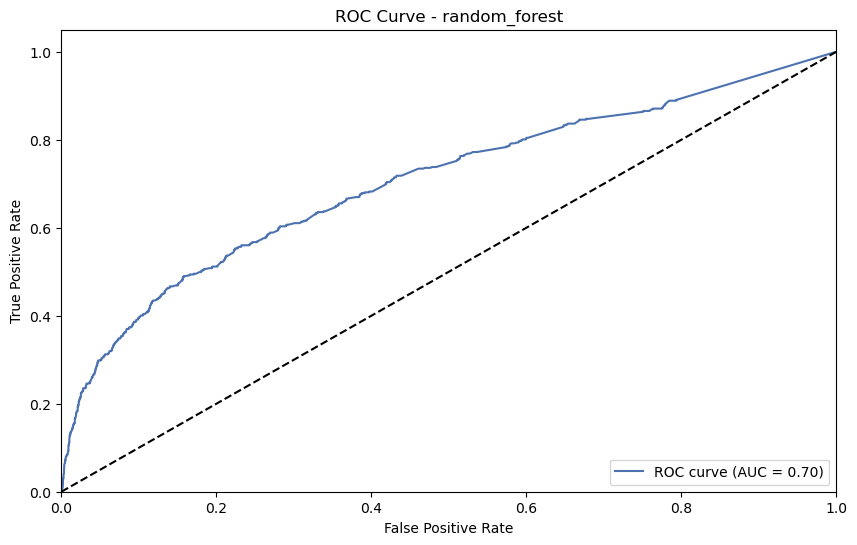

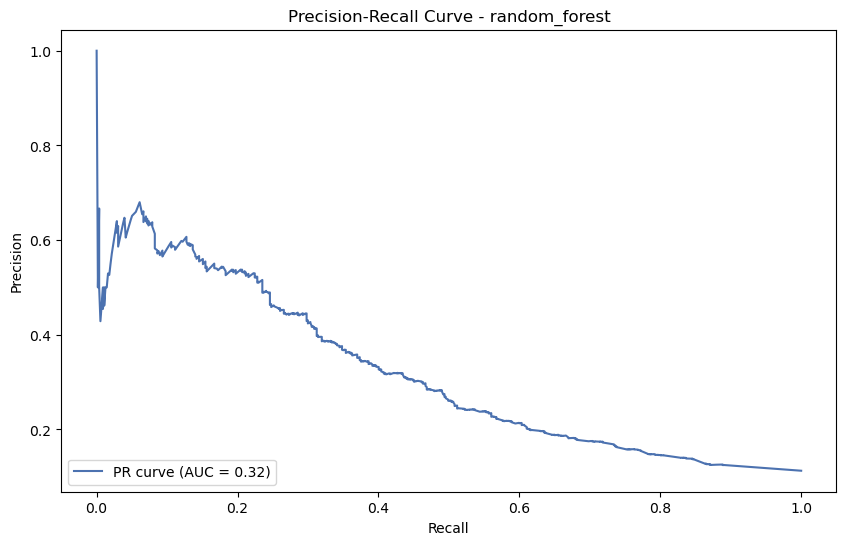


Evaluating logistic_regression...


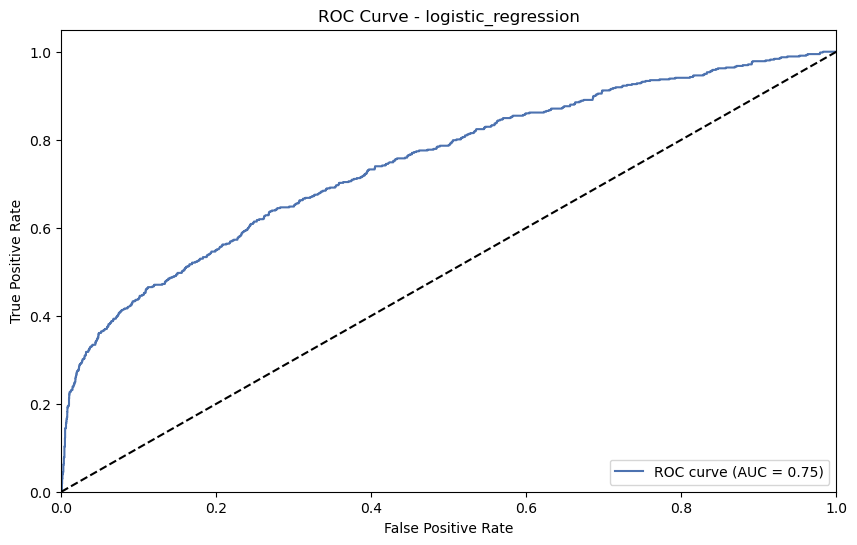

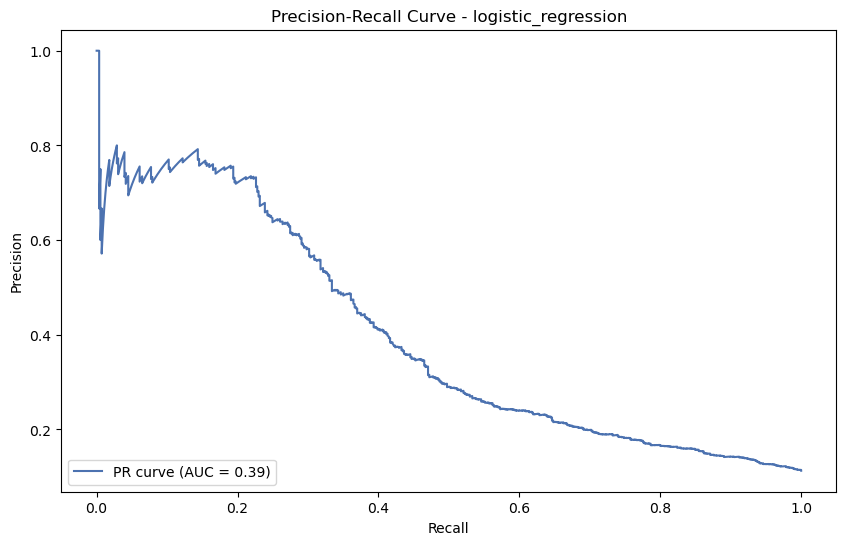

In [37]:
# 4.2 Advanced Evaluation Metrics
def evaluate_model_performance(model, X, y, model_name):
    """
    Calculate and visualize advanced model performance metrics.
    
    Parameters:
        model: Trained model pipeline
        X: Features
        y: True labels
        model_name: Name of the model for plotting
    """
    # Get predictions and probabilities
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    
    # 1. ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.savefig(f'../reports/figures/Task_1/{model_name}_roc_curve.png')
    plt.show()
    
    # 2. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y, y_prob, pos_label=1)  # Specify pos_label
    pr_auc = auc(recall, precision)
    
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.savefig(f'../reports/figures/Task_1/{model_name}_pr_curve.png')
    plt.show()
    
    return {'roc_auc': roc_auc, 'pr_auc': pr_auc}

# Apply evaluation to each model
for name, model_dict in model_results.items():
    print(f"\nEvaluating {name}...")
    metrics = evaluate_model_performance(
        model_dict['pipeline'],
        splits['development']['test'][0],
        splits['development']['test'][1],
        name
    )
    model_results[name]['advanced_metrics'] = metrics


Analyzing feature importance for random_forest...


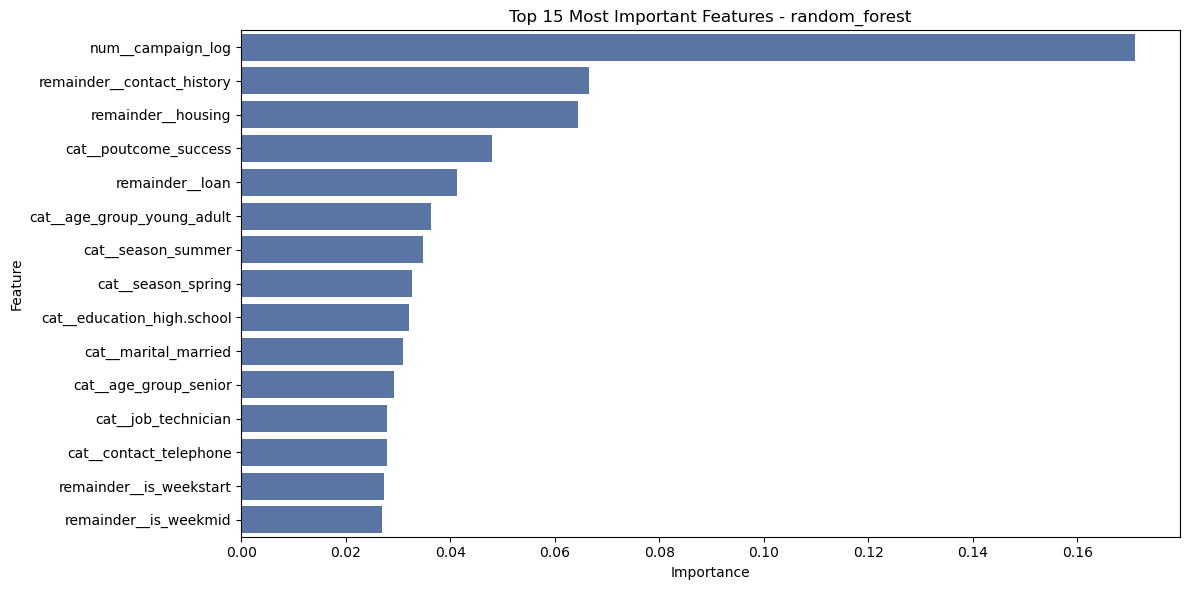


Analyzing feature importance for logistic_regression...


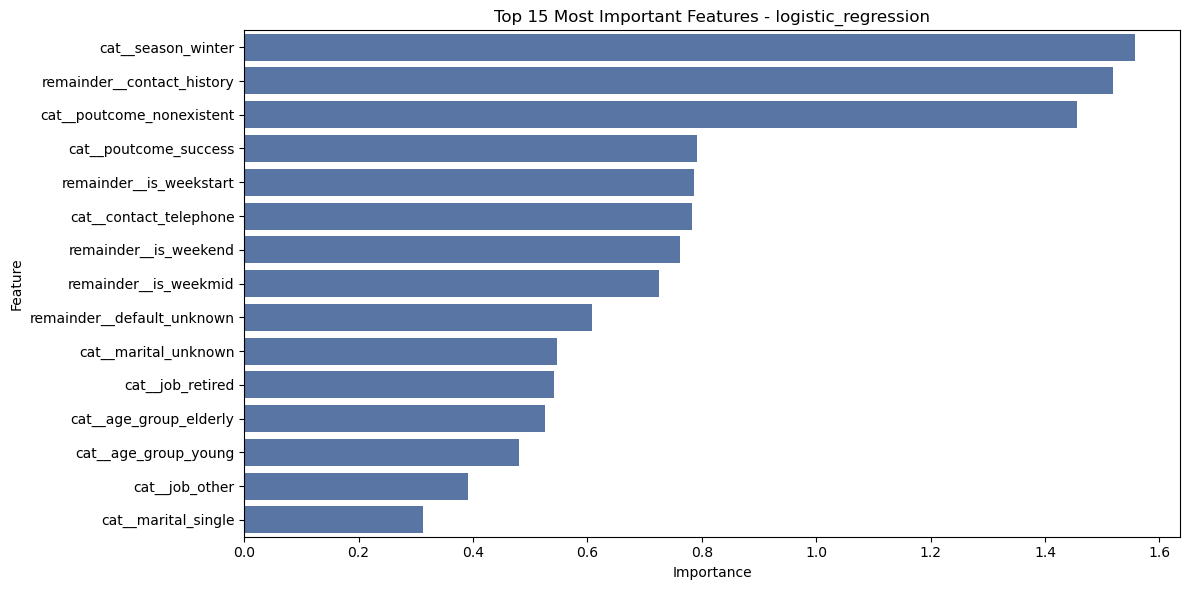

In [38]:
# 4.3 Feature Importance Analysis
def analyze_feature_importance(model, preprocessor, feature_names, model_name):
    """
    Analyze and visualize feature importance.
    """
    if hasattr(model, 'feature_importances_'):
        # For tree-based models
        importances = model.feature_importances_
    else:
        # For linear models
        importances = np.abs(model.coef_[0])
    
    # Get feature names after preprocessing
    if hasattr(preprocessor, 'get_feature_names_out'):
        feature_names = preprocessor.get_feature_names_out()
    
    # Create importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    importance_df = importance_df.sort_values('importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Most Important Features - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(f'../reports/figures/Task_1/{model_name}_feature_importance.png')
    plt.show()
    
    return importance_df

# Analyze feature importance for each model
for name, model_dict in model_results.items():
    print(f"\nAnalyzing feature importance for {name}...")
    importance_df = analyze_feature_importance(
        model_dict['pipeline'].named_steps['classifier'],
        model_dict['pipeline'].named_steps['preprocessor'],
        feature_names = None,  # Will be determined by preprocessor
        model_name=name
    )
    model_results[name]['feature_importance'] = importance_df


Model Comparison:
random_forest: 0.4287
logistic_regression: 0.4700

Best model: logistic_regression

Final Evaluation on Holdout Set:


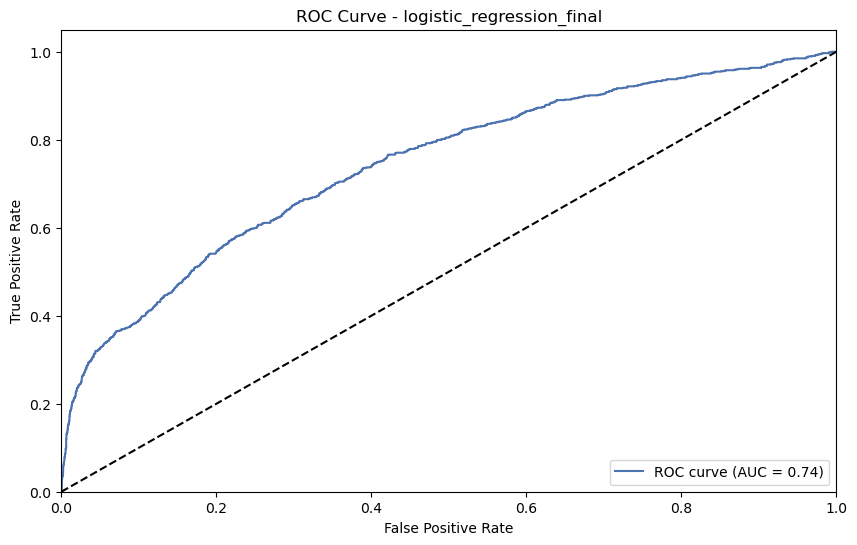

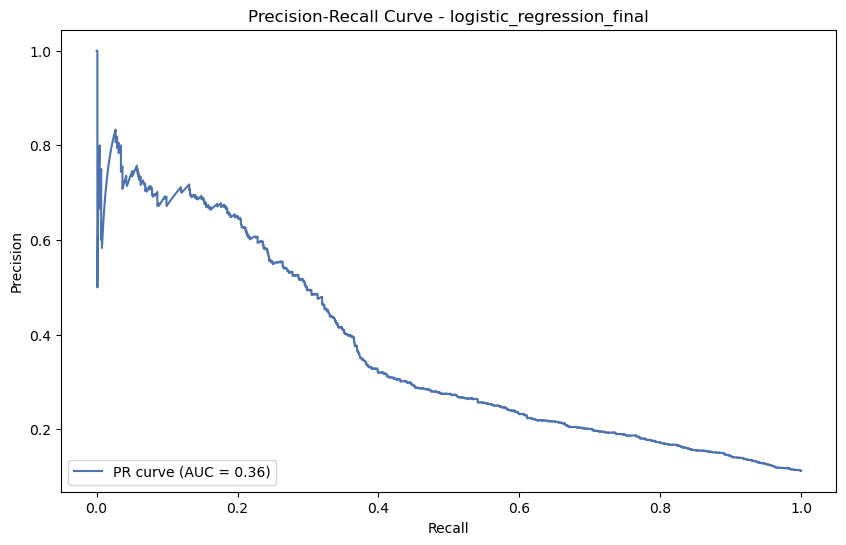

In [39]:
# 4.4 Final Model Selection and Evaluation
def select_best_model(model_results):
    """
    Select the best model based on multiple metrics.
    """
    model_scores = {}
    for name, results in model_results.items():
        # Combine all metrics
        score = (results['metrics']['f1'] + 
                results['advanced_metrics']['roc_auc'] + 
                results['advanced_metrics']['pr_auc']) / 3
        model_scores[name] = score
    
    best_model = max(model_scores.items(), key=lambda x: x[1])[0]
    return best_model, model_scores

# Select best model
best_model_name, model_scores = select_best_model(model_results)
print("\nModel Comparison:")
for name, score in model_scores.items():
    print(f"{name}: {score:.4f}")
print(f"\nBest model: {best_model_name}")

# Final evaluation on holdout set
best_model = model_results[best_model_name]['pipeline']
X_eval, y_eval = splits['evaluation']

print("\nFinal Evaluation on Holdout Set:")
final_metrics = evaluate_model_performance(
    best_model,
    X_eval,
    y_eval,
    f"{best_model_name}_final"
)

# Save final model and results
joblib.dump(best_model, f'../models/final_model.joblib')

# Create final evaluation report
evaluation_report = {
    'best_model': best_model_name,
    'model_comparisons': model_scores,
    'final_metrics': final_metrics,
    'feature_importance': model_results[best_model_name]['feature_importance'].to_dict()
}

# Save evaluation report
import json
with open('../reports/model_evaluations/model_evaluation.json', 'w') as f:
    json.dump(evaluation_report, f, indent=4)

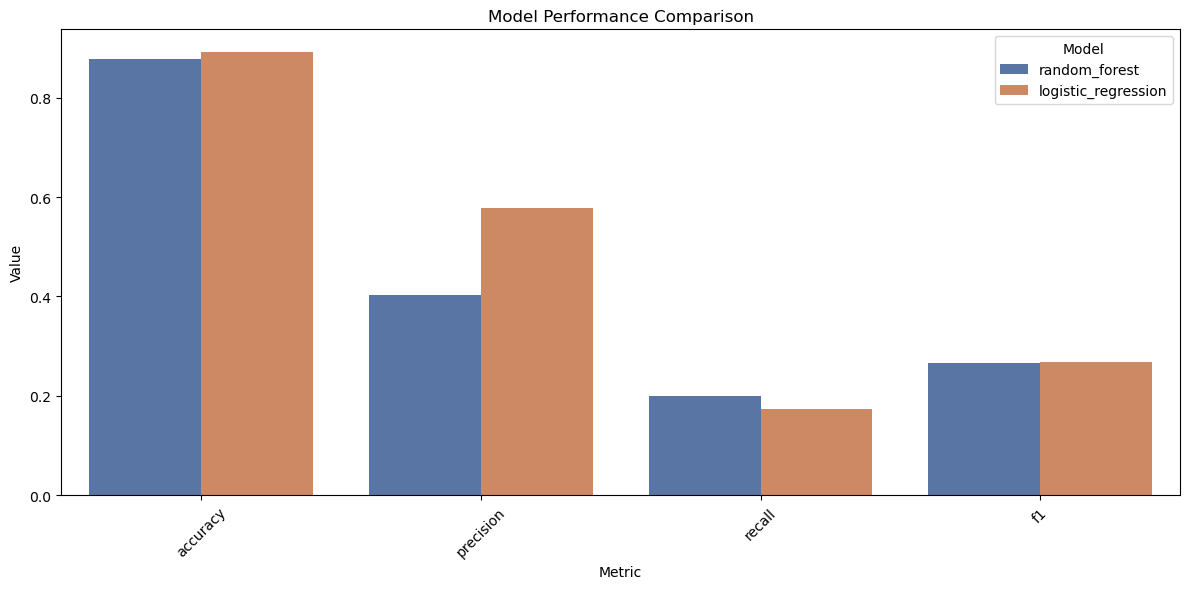

In [40]:
# Create a comprehensive performance comparison visualization
def visualize_model_comparison(model_results):
    """
    Create detailed visualization comparing model performances
    """
    # Prepare data for visualization
    metrics_df = pd.DataFrame({
        'Model': [],
        'Metric': [],
        'Value': []
    })
    
    for model_name, results in model_results.items():
        for metric, value in results['metrics'].items():
            metrics_df = pd.concat([metrics_df, pd.DataFrame({
                'Model': [model_name],
                'Metric': [metric],
                'Value': [value]
            })])
    
    # Create grouped bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=metrics_df, x='Metric', y='Value', hue='Model')
    plt.title('Model Performance Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_1/model_comparison.png')
    plt.show()

# Visualize comparison
visualize_model_comparison(model_results)

# Model Performance Analysis

## Model Comparison

### Logistic Regression Performance:
- Accuracy: 89.26%
- Precision: 57.74%
- Recall: 17.41%
- F1 Score: 26.76%

### Random Forest Performance:
- Accuracy: 87.66%
- Precision: 40.36%
- Recall: 19.93%
- F1 Score: 26.68%

## Key Insights:

1. **Overall Performance**:
   - Logistic Regression slightly outperforms Random Forest (overall score: 0.4700 vs 0.4287)
   - Both models show high accuracy but lower F1 scores

2. **Trade-offs**:
   - Logistic Regression shows better precision (57.74% vs 40.36%)
   - Random Forest shows slightly better recall (19.93% vs 17.41%)

3. **Imbalanced Data Impact**:
   - High accuracy but low recall suggests models are biased toward the majority class
   - F1 scores around 26% indicate room for improvement

## Recommendations:

1. **Model Selection**:
   - Choose Logistic Regression as the final model due to:
     * Better overall performance
     * Higher precision
     * Simpler interpretation

2. **Potential Improvements**:
   - Consider techniques to address class imbalance:
     * SMOTE
     * Class weights
     * Adjusted decision thresholds
   - Feature engineering to improve discriminative power
   - Ensemble methods or more advanced models

3. **Next Steps**:
   - Implement class balancing techniques
   - Fine-tune model hyperparameters
   - Consider cost-sensitive learning approaches